# Regression Model Comparison: Baseline and Hyperparameter Tuning
This notebook demonstrates preprocessing, training, hyperparameter tuning, and accuracy comparison for multiple regression models on tabular data. Models included: Linear Regression, Decision Tree, Random Forest, Gradient Boosting, SVM, and XGBoost.

## 1. Import Required Libraries
Import pandas, numpy, matplotlib, seaborn, scikit-learn modules, and xgboost for data analysis, visualization, modeling, and hyperparameter tuning.

In [27]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost
from xgboost import XGBRegressor

## 2. Load and Explore the Data
Load the dataset using pandas, display the first few rows, check for missing values, and summarize the data.

In [28]:
# Load the data (replace with your file path)
file_path = r'C:\MLData\8psx_data_120_cleaned.csv'
df = pd.read_csv(file_path)
df.head()

,DBL4_0.65D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,DBL4_0.65D_PLVT_D2X1S_60PP[PLVT_D2X1S_60PP]@50%@ETEST,REXTB4_0.05D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,RLMGN_GATE/NS/DFMAX/L_60PP_SL[GATE/NS/DFMAX/L_60PP_SL]@50%@ETEST,RL_0.1V_M0_22B_SL[M0_22B_SL]@50%@ETEST,IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEAN@SORT
0,62.411005,76.988180,44.747650,2.802551,392.51925,15014.38007
1,58.434730,88.828865,44.939340,3.116242,380.59920,15167.33525
2,55.158895,78.538745,41.367725,2.591772,310.17180,NaN
3,58.878395,74.881965,45.074160,2.508621,408.16270,14556.75514
4,62.129235,89.732230,45.279775,2.925623,377.48580,14920.56144


In [29]:
# Check for missing values and summarize the data
print('Missing values per column:')
print(df.isnull().sum())
df.describe()

Missing values per column:
DBL4_0.65D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST                  0
DBL4_0.65D_PLVT_D2X1S_60PP[PLVT_D2X1S_60PP]@50%@ETEST                  0
REXTB4_0.05D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST                0
RLMGN_GATE/NS/DFMAX/L_60PP_SL[GATE/NS/DFMAX/L_60PP_SL]@50%@ETEST       0
RL_0.1V_M0_22B_SL[M0_22B_SL]@50%@ETEST                                 0
IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEAN@SORT                     2702
dtype: int64


,DBL4_0.65D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,DBL4_0.65D_PLVT_D2X1S_60PP[PLVT_D2X1S_60PP]@50%@ETEST,REXTB4_0.05D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,RLMGN_GATE/NS/DFMAX/L_60PP_SL[GATE/NS/DFMAX/L_60PP_SL]@50%@ETEST,RL_0.1V_M0_22B_SL[M0_22B_SL]@50%@ETEST,IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEAN@SORT
count,3602.000000,3602.000000,3602.000000,3602.000000,3602.000000,900.000000
mean,62.616373,81.979360,43.350124,2.846914,362.531748,14990.903028
std,3.841165,6.936161,2.145500,0.209396,31.523580,243.140863
min,51.333005,62.142460,35.604915,2.202289,284.825650,14275.630860
25%,59.964984,77.211357,41.999036,2.705536,338.639200,14827.781665
50%,62.400548,81.589375,43.382275,2.837588,360.216500,14989.114615
75%,65.078806,86.391449,44.758429,2.976218,383.962713,15157.202000
max,77.762155,118.791900,52.557930,3.783915,503.889800,15763.913380


## 3. Preprocess the Data
Handle missing values, encode categorical variables, and scale/normalize features as needed.

In [30]:
# Drop rows with missing target and fill other missing values with column mean
target_col = 'IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEAN@SORT'  # Update to your target column name
if df[target_col].isnull().any():
    df = df.dropna(subset=[target_col])
df = df.fillna(df.mean(numeric_only=True))
# Encode categorical variables if any
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.drop(target_col, errors='ignore')
df = pd.get_dummies(df, columns=categorical_cols)
# Optional: scale features if needed (uncomment to use)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns.drop(target_col)] = scaler.fit_transform(df[df.columns.drop(target_col)])
df.head()

,DBL4_0.65D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,DBL4_0.65D_PLVT_D2X1S_60PP[PLVT_D2X1S_60PP]@50%@ETEST,REXTB4_0.05D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST,RLMGN_GATE/NS/DFMAX/L_60PP_SL[GATE/NS/DFMAX/L_60PP_SL]@50%@ETEST,RL_0.1V_M0_22B_SL[M0_22B_SL]@50%@ETEST,IDV_2204_XNOM3GNES12_FULLDIE_0950_MED_MEAN@SORT
0,0.583983,-0.665350,0.072549,-0.237984,0.375063,15014.38007
1,-0.694705,1.067179,0.186654,1.573079,-0.271946,15167.33525
3,-0.552032,-0.973531,0.266907,-1.934966,1.224174,14556.75514
4,0.493372,1.199360,0.389301,0.472560,-0.440939,14920.56144
5,-1.023205,-0.399438,1.584636,1.120705,1.867511,14443.94676


## 4. Feature Selection
Select top correlated features with the target variable using correlation analysis.

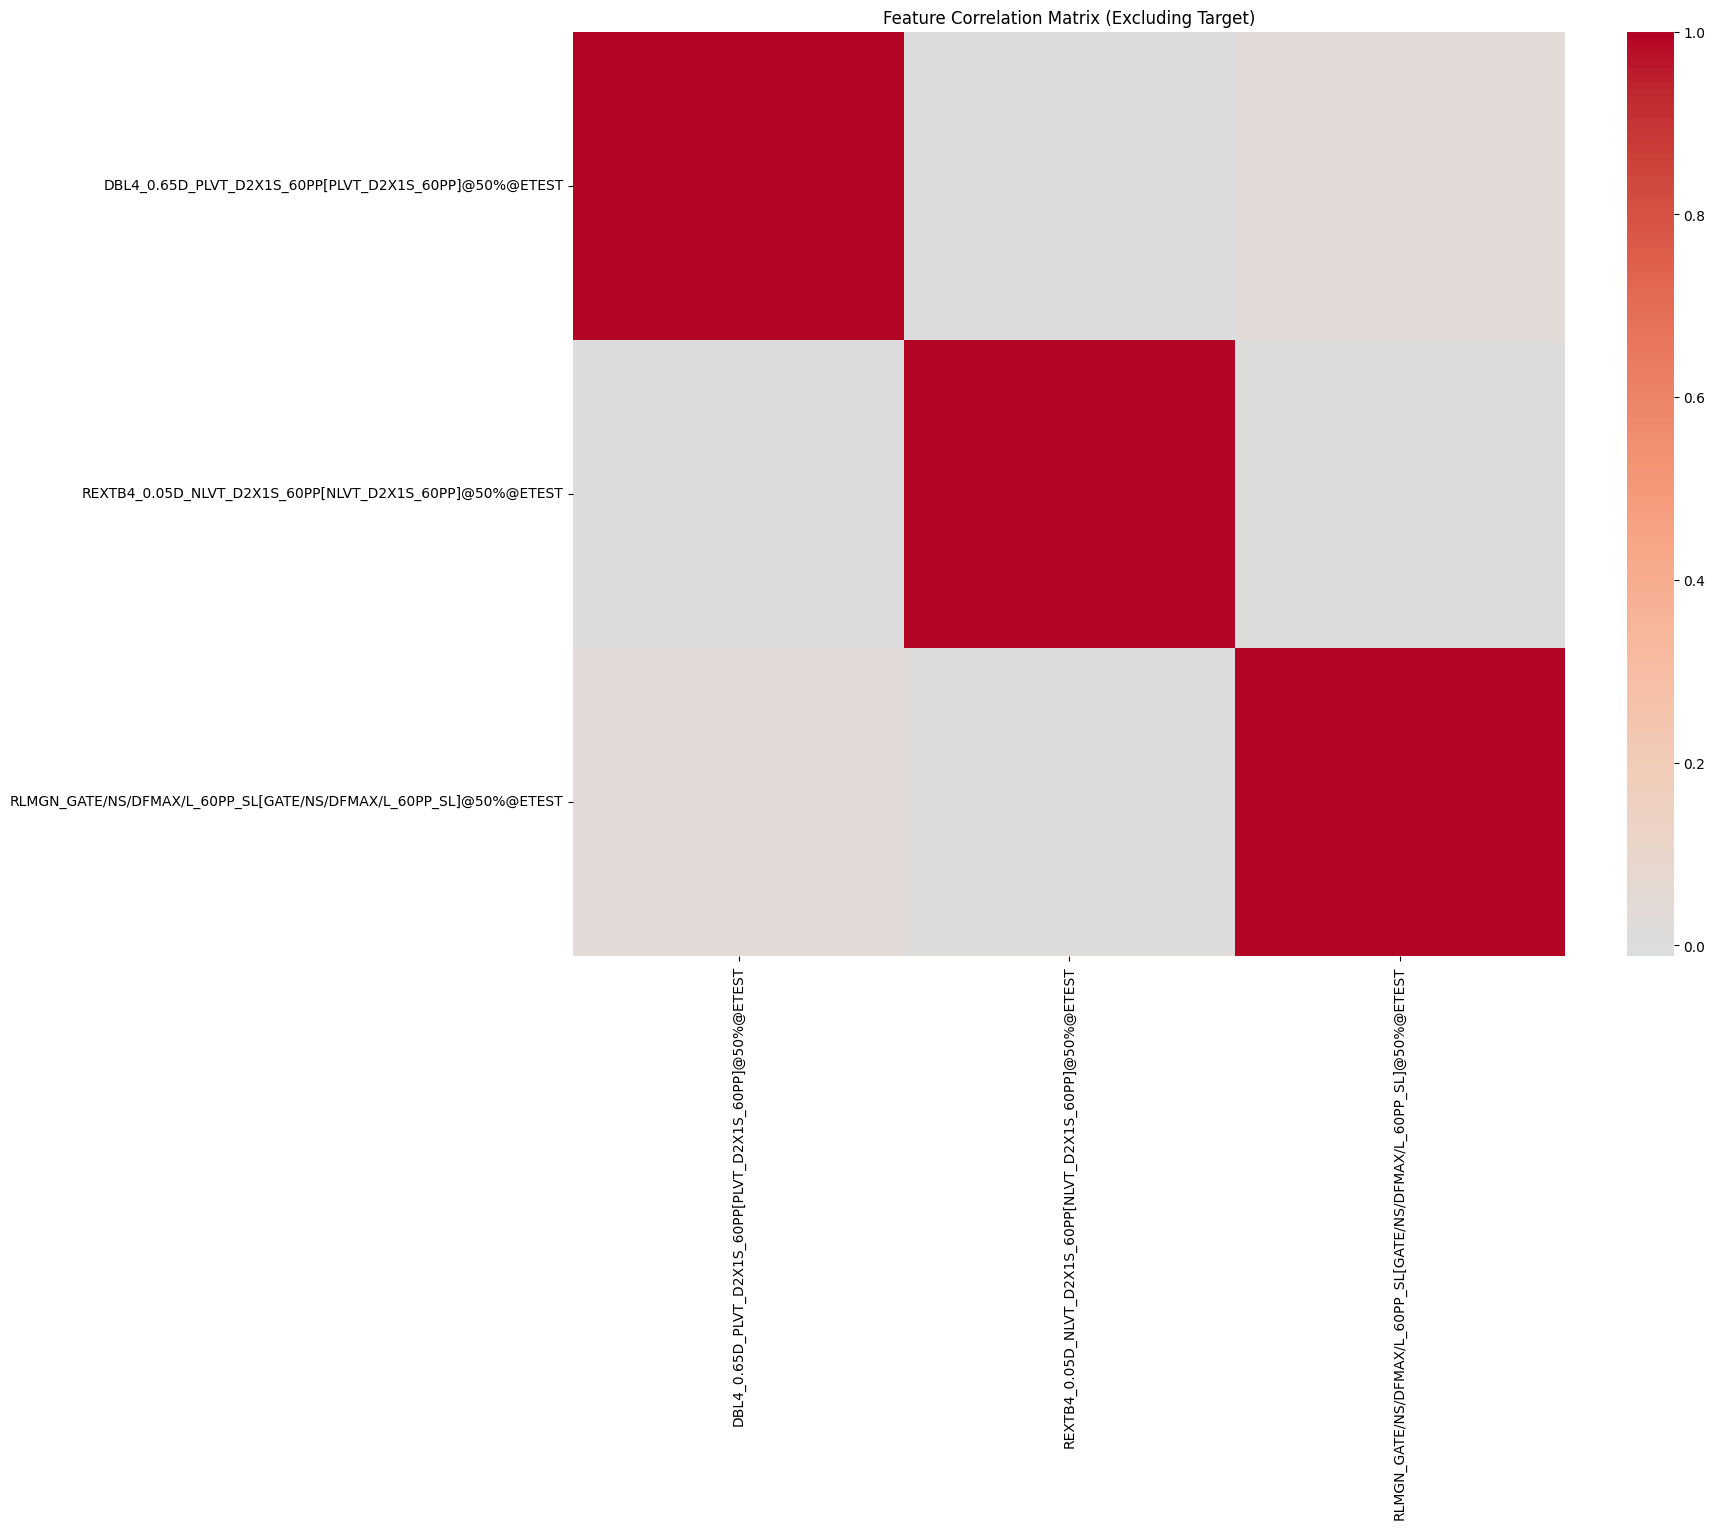

C:\Users\ashokcha\AppData\Local\Temp\ipykernel_43524\3760841634.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values[:top_n], y=correlations.index[:top_n], palette='coolwarm')


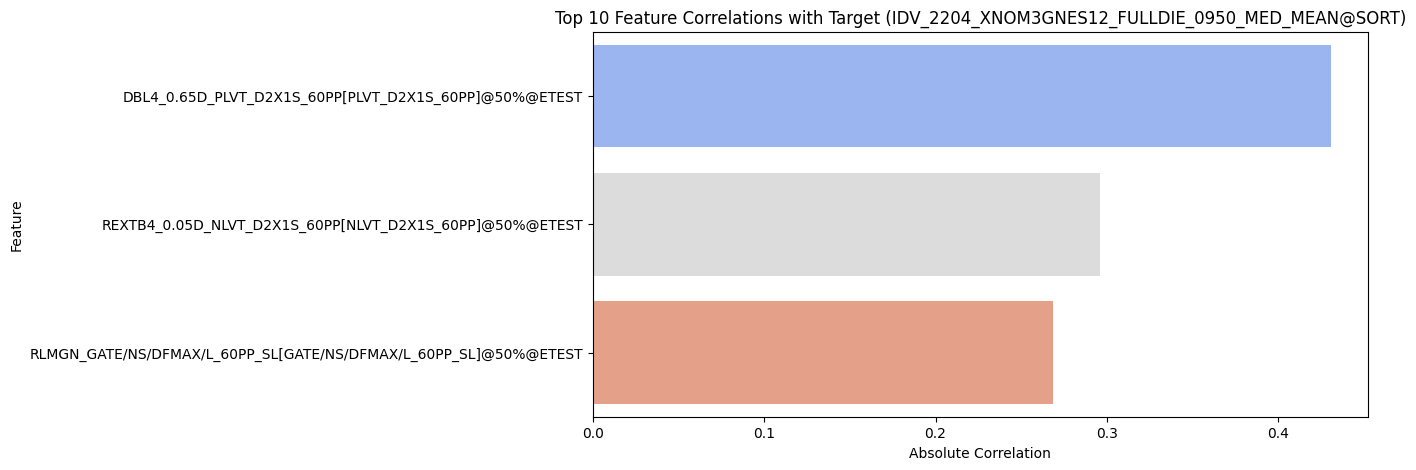

In [37]:
# Remove unwanted feature column at the end of cell
unwanted_col = 'DBL4_0.65D_NLVT_D2X1S_60PP[NLVT_D2X1S_60PP]@50%@ETEST'
if unwanted_col in df.columns:
    df = df.drop(columns=[unwanted_col])

# Correlation of each feature with the target column
correlations = df.corr()[target_col].drop(target_col).abs().sort_values(ascending=False)
# Plot full correlation matrix as a heatmap (excluding target column)
corr_features = df.drop(columns=[target_col]).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_features, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Excluding Target)')
plt.show()
# Bar plot of top 15 feature correlations with target
top_n = 10
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.values[:top_n], y=correlations.index[:top_n], palette='coolwarm')
plt.title(f'Top {top_n} Feature Correlations with Target ({target_col})')
plt.xlabel('Absolute Correlation')
plt.ylabel('Feature')
plt.show()
# Select top correlated features for modeling
top_features = correlations.index[:top_n].tolist()


## 5. Split Data into Training and Test Sets
Split the dataset into training and test sets using train_test_split.

In [38]:
# Prepare X and y, then split into train and test sets
X = df[top_features]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')

Training samples: 720, Test samples: 180


In [39]:
# Clean feature names for XGBoost compatibility
def clean_feature_names(df):
    df.columns = [str(col).replace('[','_').replace(']','_').replace('<','_').replace('>','_') for col in df.columns]
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

## 6. Train Baseline Models
Train each regression model on the training data using default hyperparameters. Models: Linear Regression, Decision Tree, Random Forest, Gradient Boosting, SVM, XGBoost.

In [40]:
# Train baseline models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVM': SVR(),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}
baseline_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    baseline_results[name] = {'MAE': mae, 'R2': r2}
    print(f"{name}: MAE={mae:.3f}, R2={r2:.3f}")

Linear Regression: MAE=147.078, R2=0.428
Decision Tree: MAE=214.576, R2=-0.165
Random Forest: MAE=157.700, R2=0.337
Gradient Boosting: MAE=161.901, R2=0.337
SVM: MAE=186.449, R2=0.100
Random Forest: MAE=157.700, R2=0.337
Gradient Boosting: MAE=161.901, R2=0.337
SVM: MAE=186.449, R2=0.100
XGBoost: MAE=185.910, R2=0.161
XGBoost: MAE=185.910, R2=0.161


## 7. Evaluate Baseline Model Performance
Evaluate each baseline model using MAE and R2 score, and visualize the results.

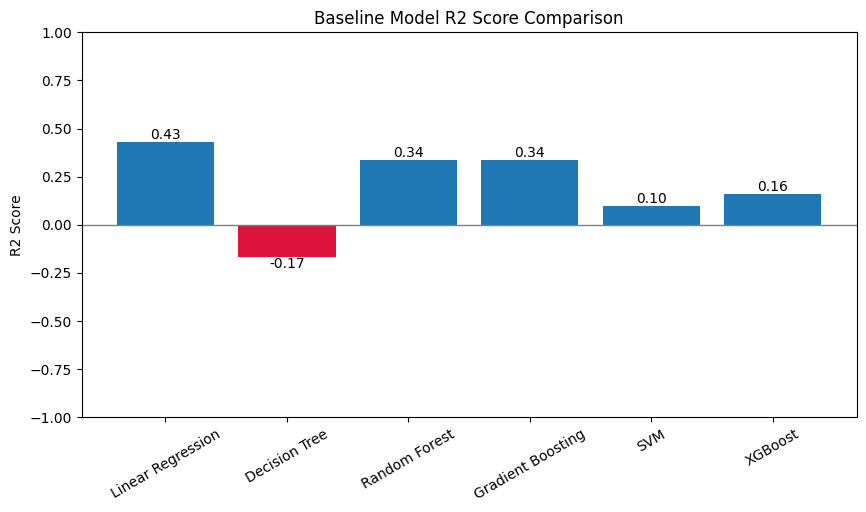

In [41]:
# Visualize baseline R2 scores
plt.figure(figsize=(10, 5))
bars = plt.bar(baseline_results.keys(), [v['R2'] for v in baseline_results.values()], color=['C0' if v['R2'] >= 0 else 'crimson' for v in baseline_results.values()])
plt.ylabel('R2 Score')
plt.title('Baseline Model R2 Score Comparison')
plt.ylim(min(-1, min(v['R2'] for v in baseline_results.values())), 1)
for rect, v in zip(bars, baseline_results.values()):
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), f"{v['R2']:.2f}", ha='center', va='bottom' if v['R2']>=0 else 'top', color='black')
plt.axhline(0, color='gray', linewidth=1)
plt.xticks(rotation=30)
plt.show()

## 8. Hyperparameter Tuning for Each Model
Use GridSearchCV or RandomizedSearchCV to tune hyperparameters for each model.

In [42]:
# Hyperparameter grids for each model
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20, 30],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 8]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
        'max_depth': [2, 3, 4, 5],
        'subsample': [0.6, 0.8, 1.0],
        'min_samples_split': [2, 4, 8],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [3, 4, 5, 6, 8],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [1, 1.5, 2]
    }
}
# Dictionary to store best models and results
tuned_results = {}
for name, model in models.items():
    print(f'\nTuning {name}...')
    grid = param_grids[name]
    if grid:
        search = GridSearchCV(model, grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        print('Best params:', search.best_params_)
        print('Best CV R2:', search.best_score_)
    else:
        best_model = model
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    tuned_results[name] = {'MAE': mae, 'R2': r2}
    print(f"{name} (Tuned): MAE={mae:.3f}, R2={r2:.3f}")


Tuning Linear Regression...
Linear Regression (Tuned): MAE=147.078, R2=0.428

Tuning Decision Tree...
Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best params: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best CV R2: 0.10980937827500363
Decision Tree (Tuned): MAE=168.597, R2=0.291

Tuning Random Forest...
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best params: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best CV R2: 0.10980937827500363
Decision Tree (Tuned): MAE=168.597, R2=0.291

Tuning Random Forest...
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best CV R2: 0.2512982489078352
Random Forest (Tuned): MAE=157.646, R2=0.354

Tuning Gradient Boosting...
Fitting 3 folds for each of 6480 candidates, totalling 19440 fits
Best params: {'max_depth': 10, 'max_features': 'sqrt',

## 9. Evaluate Tuned Model Performance
Evaluate the tuned models on the test set using MAE and R2 score, and record the results.

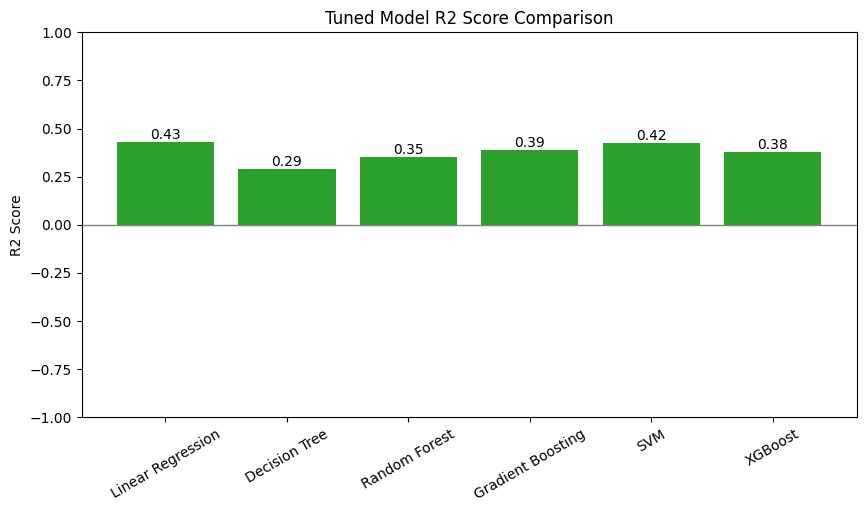

In [43]:
# Visualize tuned R2 scores
plt.figure(figsize=(10, 5))
bars = plt.bar(tuned_results.keys(), [v['R2'] for v in tuned_results.values()], color=['C2' if v['R2'] >= 0 else 'crimson' for v in tuned_results.values()])
plt.ylabel('R2 Score')
plt.title('Tuned Model R2 Score Comparison')
plt.ylim(min(-1, min(v['R2'] for v in tuned_results.values())), 1)
for rect, v in zip(bars, tuned_results.values()):
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), f"{v['R2']:.2f}", ha='center', va='bottom' if v['R2']>=0 else 'top', color='black')
plt.axhline(0, color='gray', linewidth=1)
plt.xticks(rotation=30)
plt.show()

## 10. Compare Accuracies Before and After Tuning (Visualization)
Visualize and compare the performance of models before and after hyperparameter tuning using bar plots.

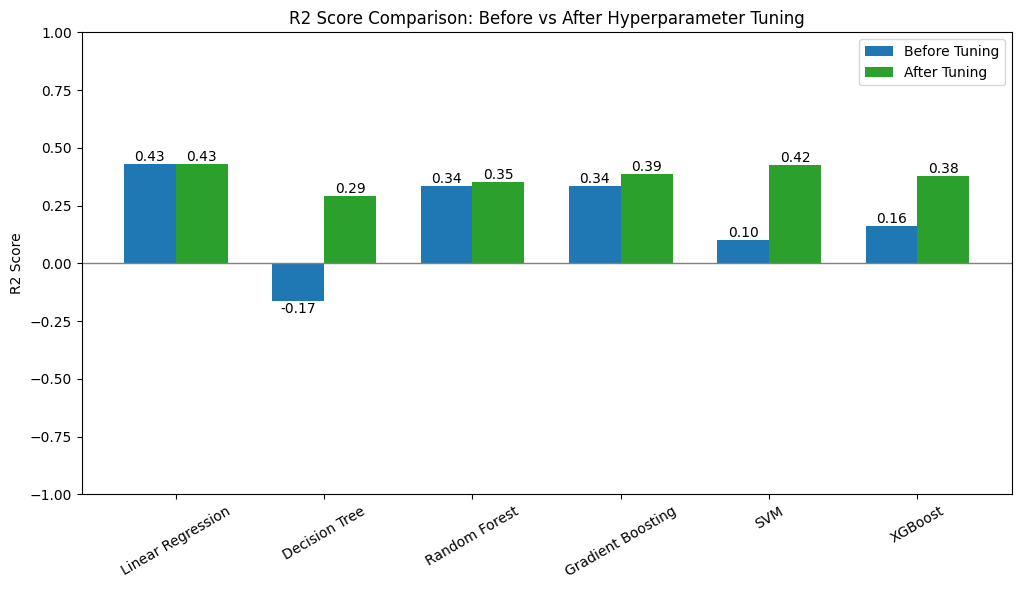

In [44]:
# Compare R2 scores before and after tuning for all models
model_names = list(baseline_results.keys())
r2_before = [baseline_results[m]['R2'] for m in model_names]
r2_after = [tuned_results[m]['R2'] for m in model_names]
x = np.arange(len(model_names))
width = 0.35
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, r2_before, width, label='Before Tuning', color='C0')
plt.bar(x + width/2, r2_after, width, label='After Tuning', color='C2')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison: Before vs After Hyperparameter Tuning')
plt.xticks(x, model_names, rotation=30)
plt.ylim(min(-1, *(r2_before + r2_after)), 1)
for i, (b, a) in enumerate(zip(r2_before, r2_after)):
    plt.text(i - width/2, b, f'{b:.2f}', ha='center', va='bottom' if b>=0 else 'top')
    plt.text(i + width/2, a, f'{a:.2f}', ha='center', va='bottom' if a>=0 else 'top')
plt.axhline(0, color='gray', linewidth=1)
plt.legend()
plt.show()

## 11. Loss Curve Visualization for Gradient Boosting and XGBoost
Plot the training loss curve (deviance) for Gradient Boosting and XGBoost to visualize model convergence.

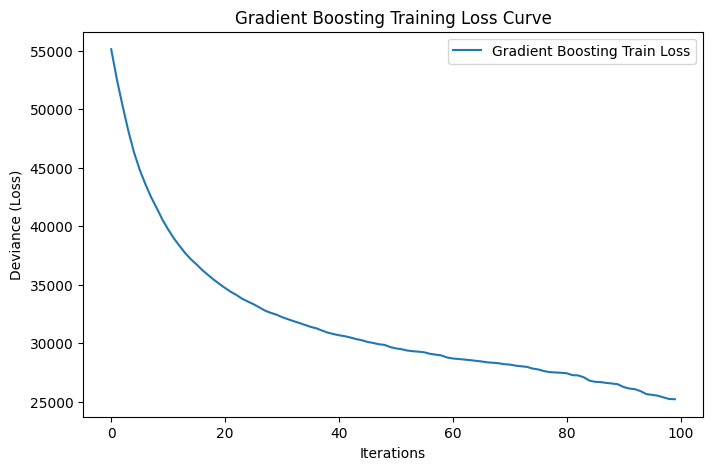

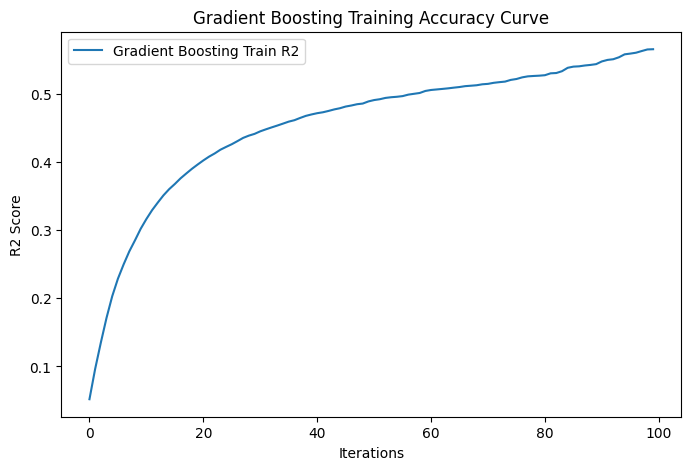

XGBoost loss/accuracy curve not available: No evaluation result, `eval_set` is not used during training.


In [46]:
# Loss curve and accuracy for Gradient Boosting (if available)
if 'Gradient Boosting' in tuned_results:
    try:
        gb_model = [m for n, m in models.items() if n == 'Gradient Boosting'][0]
        if hasattr(gb_model, 'train_score_'):
            plt.figure(figsize=(8, 5))
            plt.plot(np.arange(len(gb_model.train_score_)), gb_model.train_score_, label='Gradient Boosting Train Loss')
            plt.xlabel('Iterations')
            plt.ylabel('Deviance (Loss)')
            plt.title('Gradient Boosting Training Loss Curve')
            plt.legend()
            plt.show()
        # Accuracy (R2) over iterations (if staged_predict available)
        if hasattr(gb_model, 'staged_predict'):
            r2_scores = [r2_score(y_train, y_pred) for y_pred in gb_model.staged_predict(X_train)]
            plt.figure(figsize=(8, 5))
            plt.plot(np.arange(len(r2_scores)), r2_scores, label='Gradient Boosting Train R2')
            plt.xlabel('Iterations')
            plt.ylabel('R2 Score')
            plt.title('Gradient Boosting Training Accuracy Curve')
            plt.legend()
            plt.show()
    except Exception as e:
        print('Gradient Boosting loss/accuracy curve not available:', e)
# Loss curve and accuracy for XGBoost (if available)
if 'XGBoost' in tuned_results:
    try:
        xgb_model = [m for n, m in models.items() if n == 'XGBoost'][0]
        if hasattr(xgb_model, 'evals_result'):
            evals_result = xgb_model.evals_result()
            if 'validation_0' in evals_result and 'rmse' in evals_result['validation_0']:
                plt.figure(figsize=(8, 5))
                plt.plot(evals_result['validation_0']['rmse'], label='XGBoost Train RMSE')
                plt.xlabel('Iterations')
                plt.ylabel('RMSE')
                plt.title('XGBoost Training Loss Curve')
                plt.legend()
                plt.show()
        # Accuracy (R2) over iterations (if evals_result contains predictions)
        if hasattr(xgb_model, 'predict'):
            # XGBoost does not provide staged_predict, so we can only show final R2
            y_pred = xgb_model.predict(X_train)
            r2 = r2_score(y_train, y_pred)
            print(f'XGBoost Train R2 (final): {r2:.3f}')
    except Exception as e:
        print('XGBoost loss/accuracy curve not available:', e)